# 创建生成使用的数据集

In [25]:
def createDataSet():
    """
    函数说明:创建数据集
    Return:
            dataSet:创建的数据集
            labels:数据集中数据对应的标签
    
    """
    dataSet = [[0, 0, 0, 0, 'no'],#数据集
             [0, 0, 0, 1, 'no'],
             [0, 1, 0, 1, 'yes'],
             [0, 1, 1, 0, 'yes'],
             [0, 0, 0, 0, 'no'],
             [1, 0, 0, 0, 'no'],
             [1, 0, 0, 1, 'no'],
             [1, 1, 1, 1, 'yes'],
             [1, 0, 1, 2, 'yes'],
             [1, 0, 1, 2, 'yes'],
             [2, 0, 1, 2, 'yes'],
             [2, 0, 1, 1, 'yes'],
             [2, 1, 0, 1, 'yes'],
             [2, 1, 0, 2, 'yes'],
             [2, 0, 0, 0, 'no']]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况']#特征标签
    return dataSet, labels

In [56]:
dataSet, labels1 = createDataSet()

# 决策树的构建和训练模型

In [23]:
import math
import operator

In [24]:
def informationEntropy(dataset):
    """
    函数声明:计算给定数据集的信息熵
    Parameters:
            dataset:要求信息熵的数据集
    Return:
            entopy:求出的信息熵
    """
    # 要返回的信息熵
    entropy = 0
    numbersOfEntity = len(dataset)
    # 取dataset中所有拥有的种类，转化为集合去重
    allClassifiesCount = {}
    for entity in dataset:
        entityClassify = entity[-1]
        if not entityClassify in allClassifiesCount:
            allClassifiesCount[entityClassify] = 0
        
        allClassifiesCount[entityClassify]+=1
    for classify in allClassifiesCount:
        probaility = allClassifiesCount[classify]/numbersOfEntity
        entropy-=probaility*math.log(probaility,2) 
    return entropy
            
    
    

In [36]:
a= [[1],[1],[2]]

In [37]:
informationEntropy(a)

0.9182958340544896

In [27]:
informationEntropy(dataSet)

0.9709505944546686

In [28]:
def splitDataset(dataset,axis,value):
    """
    函数说明:对数据集按照特征进行划分，如果axis上的变量值等于value，就添加到要返回的数据集中
    Parameters:
            dataset:数据集
            axis:要进行划分的特征
            value:划分要求的特征值
    Return:
            returnDataset:划分后的数据集
    """
    returnDataset=[]
    for entry in dataset:
        if entry[axis] == value:
            returnDataset.append(entry[0:axis]+entry[axis+1:])
    return returnDataset
            
            

In [29]:
splitDataset(dataSet,0,0)

[[0, 0, 0, 'no'],
 [0, 0, 1, 'no'],
 [1, 0, 1, 'yes'],
 [1, 1, 0, 'yes'],
 [0, 0, 0, 'no']]

In [30]:
def selectBestSplit(dataset):
    """
    函数说明：对数据集用每种特征进行划分，选择信息增益的特征进行划分
    Parameters:
            dataset:要进行划分的数据集
    Return:
            feature:要选取的特征
    """
    # 数据集中所有实体
    numberOfEntity = len(dataset)
    # 特征的数量
    numberOfFeature = len(dataset[0])-1
    # 未进行划分时的信息熵
    baseInformationEntropy = informationEntropy(dataset)
    # 最好的信息增益
    bestInformationGain = 0.0
    # 进行划分信息增益最多的特征
    bestFesture = -1
    for feature in range(numberOfFeature):
        """
        依次对每一种特征进行性划分，并计算使用这种特征进行划分的信息熵
        """
        # 该特征的所有可能的值
        featureOfValues = set([entity[feature] for entity in dataset])
        # 这次划分得到的信息熵
        newInformationEntropy = 0.0
        for value in featureOfValues:
            """
            依次按照此特征的所有可能的值进行划分
            """
            # 调用函数，得到划分得到的数据集合
            oneOfSplitDataset = splitDataset(dataset,feature,value)
            # 得到的集合的唱的
            lenthOneOfSplitDataset = len(oneOfSplitDataset)
            # 使用这种特征的可能的值得到实体的概率
            probaility = lenthOneOfSplitDataset/numberOfEntity
            # 计算这种特征划分后的信息熵
            newInformationEntropy+=probaility*informationEntropy(oneOfSplitDataset)
        # 计算信息增益
        informationGain = baseInformationEntropy - newInformationEntropy
        # 找到信息增益最多的划分特征
        if(informationGain>bestInformationGain):
            bestFesture = feature
    return bestFesture
            
            
        
    

In [31]:
selectBestSplit(dataSet)

3

In [32]:
def majorityCut(classifyList):
    """
    函数说明：找到最多的分类
    Parameters: 
            classifyList：要查找的列表
    Return:
            sortclassifySet[0][0]：列表中占比最大的种类
    """
    classifySet = {}
    for classify in classifyList:
        if classify not in classifySet:
            classifySet[classify] = 0
        classifySet[classify]+=1
    sortclassifySet = sorted(classifySet.items(),key = operator.itemgetter(1), reverse=True)
    return sortclassifySet[0][0]
        

In [33]:
majorityCut(a)

1

In [57]:
def createDecisionTree(dataset,labels):
    """
    函数说明:创建决策树
    Parameters:
            dataset:要创建决策树的数据集
            labels:分类的类别标签
    Return:
            decisionTree:决策树
    
    """
    labels = labels[:]
    classList = [entity[-1] for entity in dataset]
    # 判断是否结束并返回
    if len(set(classList))==1:
        return classList[0]
    if len(dataset[0])==1:
        return majorityCut(classList)
    #找到最佳划分特征
    bestFeture = selectBestSplit(dataset)
    #最佳划分特征的标签
    bestFetureLabel = labels[bestFeture]
    # 删除已经使用过的特征
    del labels[bestFeture]
    # 决策数特征对应的判断
    DecisionTree = {bestFetureLabel:{}}
    # 查找此特征的所有值
    bestFetureValues = set([entity[bestFeture] for entity in dataset])
    for bestFetureValue in bestFetureValues:
        """
        按照此特征的不同，划分数据集
        """
        nextLabels = labels[:]
        DecisionTree[bestFetureLabel][bestFetureValue] = \
        createDecisionTree(splitDataset(dataset,bestFeture,bestFetureValue),nextLabels)
    return DecisionTree
    
    

    

In [58]:
dataSet, labels1 = createDataSet()

In [267]:
mytree = createDecisionTree(dataSet,labels1)

# 模型存储和读取

In [96]:
import pickle

In [121]:
def saveTree(decisionTree,saveFile):
    """
    函数说明：进行序列化存储
    Parameters:
            decisionTree:训练得到的决策树
            saveFile:要进行存储的文件位置
    """
    with open(saveFile,"wb") as file:
        pickle.dump(decisionTree, file)

In [122]:
def readTree(treeFile):
    """
    函数说明：进行序列化读取
    Parameters:
            treeFile:要进行读取的文件位置
    Return:
            tree:读取到决策树数据
    """
    with open(treeFile,"rb") as file:
        tree = pickle.load(file)
        return tree

In [123]:
saveTree(tree，"decisionTree")

In [124]:
readTree("decisionTree")

{'信贷情况': {0: {'有自己的房子': {0: 'no', 1: 'yes'}},
  1: {'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}},
  2: 'yes'}}

# 模型调用

In [60]:
def classify(decisionTree, featureLabel, testVec):
        """
    函数说明:调用决策树模型
    Parameters:
            dataset:决策树
            labels:特征名称组成的列表
            testVec:测试人每个特征对应的的值
    Return:
            decisionTree:决策树
    
    """
    # 查询的特征
    firstFeature = list(decisionTree.keys())[0]
    #　查询特征对应的索引
    indexOfFeature = featureLabel.index(firstFeature)
    # 查询特征对应的值
    firstFeatureValue = testVec[indexOfFeature]
    # 查询后匹配到的决策树
    nextTree = decisionTree[firstFeature][firstFeatureValue]
    if isinstance(nextTree,dict):
        """
        查找最后的结果
        判断返回是否是最后结果，如果是就结束递归
        """
        return classify(nextTree,featureLabel,testVec)
    else:
        return nextTree

In [61]:
classify(tree,labels1,[0, 0, 0, 1])

'no'

In [128]:
labels1,dataSet

(['年龄', '有工作', '有自己的房子', '信贷情况'],
 [[0, 0, 0, 0, 'no'],
  [0, 0, 0, 1, 'no'],
  [0, 1, 0, 1, 'yes'],
  [0, 1, 1, 0, 'yes'],
  [0, 0, 0, 0, 'no'],
  [1, 0, 0, 0, 'no'],
  [1, 0, 0, 1, 'no'],
  [1, 1, 1, 1, 'yes'],
  [1, 0, 1, 2, 'yes'],
  [1, 0, 1, 2, 'yes'],
  [2, 0, 1, 2, 'yes'],
  [2, 0, 1, 1, 'yes'],
  [2, 1, 0, 1, 'yes'],
  [2, 1, 0, 2, 'yes'],
  [2, 0, 0, 0, 'no']])

In [287]:
mytree['信贷情况']

{0: {'有自己的房子': {0: 'no', 1: 'yes'}},
 1: {'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}},
 2: 'yes'}

# 决策树可视化

In [372]:
from graphviz import Digraph

def drawTree(tree):
    """
    函数说明:绘画出决策树的图像
    Parameters:
            tree：训练得到的决策树，字典
    """
    # 创建graphviz画图使用的对象
    # 使用graph_attr, node_attr, edge_attr参数, 你可以更改图中节点和边的显示样式:全局配置
    dot = Digraph(name="myTree",comment="draw decisionTree", format="png",node_attr={'shape': 'box'})
    dot.shape="record"
#     dot.node(shape="record")
    # 区分节点使用的名字，使用chr把数字转化为名字
    nodeNumber= 65
    print(666,nodeNumber)
    def draw(tree,previousNodeName="noHave",previousValue='noHave'):
        nonlocal nodeNumber
        # 每一次加4，以保证使用的名字不同
        nodeNumber = nodeNumber+4
        firstNodeName = chr(nodeNumber)
        firstNode = list(tree.keys())[0]
        dot.node(name=firstNodeName,label=firstNode)
        print("***************",firstNode,nodeNumber,firstNodeName)

        if not previousNodeName =="noHave":
            dot.edge(previousNodeName,firstNodeName,label=str(previousValue),shape="Mdiamond")
        nextNodeNumber = 0
        for value in tree.get(firstNode):
            # 因为有时在for循环中运行因为是叶子节点不递归调用函数，所以会出现名字重复的情况，所以为了保证名字不重复，进行加4
            nodeNumber = nodeNumber+4
            nextNodeNumber = nextNodeNumber+1
            nextNodeName = chr(nodeNumber+nextNodeNumber)
            nextNode = tree[firstNode].get(value)
            print(value,nextNode,nextNodeName)
            if isinstance(nextNode,dict):
               draw(nextNode,firstNodeName,value)
            else:
                dot.node(name=nextNodeName,label=nextNode)
                dot.edge(firstNodeName,nextNodeName,label=str(value))

    draw(tree)
    # 显示决策树图像
    dot.view()

In [373]:
drawTree(mytree)

666 65
*************** 信贷情况 69 E
0 {'有自己的房子': {0: 'no', 1: 'yes'}} J
*************** 有自己的房子 77 M
0 no R
1 yes W
1 {'有自己的房子': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}} [
*************** 有自己的房子 93 ]
0 {'有工作': {0: 'no', 1: 'yes'}} b
*************** 有工作 101 e
0 no j
1 yes o
1 yes s
2 yes x


# 使用sklearn实现决策树，并且完成可视化

使用sklearn完成的决策树，与上方自己的算法得到决策树有所不同，应该是 sklearn使用了其他优化的算法，等待深入研究后补充

In [217]:
# 把数据的特征和判断结果拆分
trainx = [entity[0:4] for entity in dataSet]
trainy = [entity[4] for entity in dataSet]

In [218]:
trainx,trainy

([[0, 0, 0, 0],
  [0, 0, 0, 1],
  [0, 1, 0, 1],
  [0, 1, 1, 0],
  [0, 0, 0, 0],
  [1, 0, 0, 0],
  [1, 0, 0, 1],
  [1, 1, 1, 1],
  [1, 0, 1, 2],
  [1, 0, 1, 2],
  [2, 0, 1, 2],
  [2, 0, 1, 1],
  [2, 1, 0, 1],
  [2, 1, 0, 2],
  [2, 0, 0, 0]],
 ['no',
  'no',
  'yes',
  'yes',
  'no',
  'no',
  'no',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'yes',
  'no'])

In [219]:
from sklearn import tree
import pydotplus
import graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image 

In [220]:
# 创建决策树，最大深度为4
sklearnTree = tree.DecisionTreeClassifier(max_depth=4)

In [221]:
# 给决策树喂入数据
sklearnTree.fit(trainx,trainy)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [235]:
# 测试决策树
sklearnTree.predict([[2,0,0,0]])

array(['no'], dtype='<U3')

In [258]:
dot_data = StringIO()
# 转化为graphviz画图所用格式，输出到dot_data中
tree.export_graphviz(sklearnTree, out_file = dot_data,feature_names = labels1, class_names=["yes","no"],filled=True, rounded=True,
                    special_characters=True)

In [259]:
# 使用pydotplus中的画图接口调用graphviz的画图接口
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("tree.pdf")

True

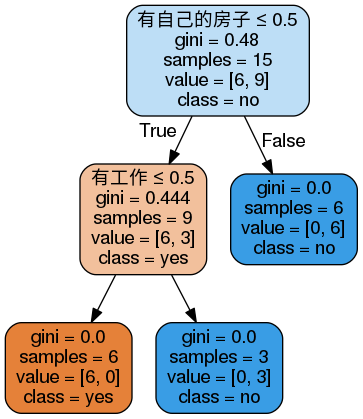

In [260]:
display(Image(graph.create_png()))